In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.arange(-80, 81, 0.5)
y = x ** 2 + 5*x + 3
y.shape

(322,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape

((257,), (65,))

In [ ]:
model_2 = keras.Sequential()
model_2.add(keras.layers.Dense(units=256, activation='relu', input_shape=[1]))
model_2.add(keras.layers.Dense(units=256, activation='relu'))
model_2.add(keras.layers.Dense(units=256, activation='relu'))
model_2.add(keras.layers.Dense(units=256, activation='relu'))
model_2.add(keras.layers.Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
loss = keras.losses.MeanSquaredError
#metric = tf.metrics.RootMeanSquaredError()
#model_2.compile(optimizer=optimizer, loss=loss, metrics=metric)
model_2.compile(optimizer=optimizer, loss=loss)

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=300, restore_best_weights=True)

In [ ]:
hist = model_2.fit(x_train, y_train, epochs=1000, batch_size=128, callbacks=[early_stop], validation_data = (x_test, y_test))

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 447ms/step - loss: 8202471.0000 - val_loss: 8563455.0000
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8415314.0000 - val_loss: 8546771.0000
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8804015.0000 - val_loss: 8538084.0000
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8396776.0000 - val_loss: 8529802.0000
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8530986.0000 - val_loss: 8520728.0000
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8382669.0000 - val_loss: 8511250.0000
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8474034.0000 - val_loss: 8494456.0000
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 7893110.5000 - val_loss: 8485052.0000
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8238986.0000 - val_loss: 8475762.0000
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8273117.5000 - val_loss: 8459745.0000
Epoch 11/1000
3/3 ━━━━━━━━━━

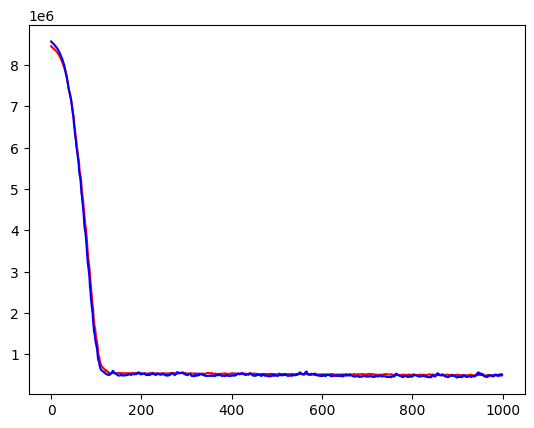

In [ ]:
plt.plot(hist.history['loss'], color='red')
plt.plot(hist.history['val_loss'], color='blue')
plt.show()